Kelompok : Shogun
Anggota Kelompok : 
1. Yohani Seprini (210711478)
2. Marcella Alicia Ndala (220711907)
3. Mardika Gidion Omega Limbongan (220712025)
4. Aprilius Setio Budi Juja (220712045)
5. Jawara Theo Christo (220712066)

* Note: random_state=78, train_test=0.25 menggunakan 75:25

# Notebook 1: Random Forest dam Logistic Regression
### Model Klasifikasi
- Perbandingan algoritme berbasis tree dan linear

### 1. Data Loading

In [1]:
import pandas as pd
import numpy as np

# load file
df_dataUTS = pd.read_csv('D:\Projek UTS PMDPM_A_SHOGUN\Dataset UTS_Gasal 2425.csv')
# menampilkan 10 data
df_dataUTS.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,7986665.8,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,7607322.9,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,6420823.1,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,9244344.0,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,9515440.4,Luxury


Menghapus baris yang memiliki NaN di kolom tertentu

In [2]:
df_dataUTS2 = df_dataUTS.dropna(subset=['hasyard', 'haspool', 'hasstormprotector', 'hasstorageroom'])
# menampilkan 10 data setelah penghapusan
df_dataUTS2.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,7986665.8,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,7607322.9,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,6420823.1,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,9244344.0,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,9515440.4,Luxury


Menampilkan informasi data

In [3]:
df_dataUTS2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squaremeters       10000 non-null  int64  
 1   numberofrooms      10000 non-null  int64  
 2   hasyard            10000 non-null  object 
 3   haspool            10000 non-null  object 
 4   floors             10000 non-null  int64  
 5   citycode           10000 non-null  int64  
 6   citypartrange      10000 non-null  int64  
 7   numprevowners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isnewbuilt         10000 non-null  object 
 10  hasstormprotector  10000 non-null  object 
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasstorageroom     10000 non-null  object 
 15  hasguestroom       10000 non-null  int64  
 16  price              1000

Menampilkan deskripsi data

In [4]:
df_dataUTS2.describe()

,squaremeters,numberofrooms,floors,citycode,citypartrange,numprevowners,made,basement,attic,garage,hasguestroom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,50.276300,50225.486100,5.510100,5.521700,2005.48850,5033.103900,5028.01060,553.12120,4.99460,4.993448e+06
std,28774.37535,28.816696,28.889171,29006.675799,2.872024,2.856667,9.30809,2876.729545,2894.33221,262.05017,3.17641,2.877424e+06
min,89.00000,1.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,1.00000,100.00000,0.00000,1.031350e+04
25%,25098.50000,25.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,2559.750000,2512.00000,327.75000,2.00000,2.516402e+06
50%,50105.50000,50.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,5092.500000,5045.00000,554.00000,5.00000,5.016180e+06
75%,74609.75000,75.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,7511.250000,7540.50000,777.25000,8.00000,7.469092e+06
max,99999.00000,100.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,10000.000000,10000.00000,1000.00000,10.00000,1.000677e+07


Train-Test Split

In [5]:
# Random Forest Classifier dan Logistic Regression
from sklearn.model_selection import train_test_split

# menentukan data target dan data feature
X_classif = df_dataUTS2.drop(columns=['category', 'price'])
# menentukan data target
y_classif = df_dataUTS2['category']

X_classif_train, X_classif_test, y_classif_train, y_classif_test = train_test_split(
    X_classif, y_classif, test_size=0.25, random_state=78
)

print("X Classification train shape: ", X_classif_train.shape)
print("X Classification test shape: ", X_classif_test.shape)

print("Y Classification train shape: ", y_classif_train.shape)
print("Y Classification test shape: ", y_classif_test.shape)

print("X_train: \n", X_classif_train)
print("X_test: \n", X_classif_test)

X Classification train shape:  (7500, 16)
X Classification test shape:  (2500, 16)
Y Classification train shape:  (7500,)
Y Classification test shape:  (2500,)
X_train: 
       squaremeters  numberofrooms hasyard haspool  floors  citycode  \
6422         20159             23     yes     yes      54     38198   
4355         73097             52     yes      no      53     31906   
3278         78463             33      no      no      79     67986   
4521         60514             46     yes     yes      35     76413   
6774         14185              3     yes      no      94     76994   
...            ...            ...     ...     ...     ...       ...   
6249          6578             34      no     yes      27      2875   
4136         61235             83      no     yes      36       630   
6039         14436             15      no      no       6      9002   
470          71418             20      no     yes      47      2634   
6853         41090             24      no     ye

### 2. Data Checking

Cek data null, kosong, NaN, duplikat

In [6]:
print("Data null :\n", df_dataUTS2.isnull().sum())
print("\nData kosong :\n", df_dataUTS2.empty)
print("\nData NaN :\n", df_dataUTS2.isna().sum())
print("\nData duplikat :\n", df_dataUTS2.duplicated().sum())

Data null :
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
category             0
dtype: int64

Data kosong :
 False

Data NaN :
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
category             0
dtype: int64

Data duplikat :
 0


Cek data outlier

In [7]:
numerical_columns = df_dataUTS2.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    Q1 = df_dataUTS2[col].quantile(0.25)
    Q3 = df_dataUTS2[col].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    outliers = ((df_dataUTS2[col] < batas_bawah) | (df_dataUTS2[col] > batas_atas)).sum()
        
    print(f"Data outlier di kolom {col}: {outliers}")
    print("Jumlah baris DataFrame sebelum dibuat outlier", df_dataUTS2.shape[0])

Data outlier di kolom squaremeters: 0
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom numberofrooms: 0
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom floors: 0
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom citycode: 0
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom citypartrange: 0
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom numprevowners: 0
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom made: 0
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom basement: 0
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom attic: 0
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom garage: 0
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom hasguestroom: 0
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom price: 0
Jumlah bari

Mengubah String menjadi Numerik

In [8]:
df_dataUTS2.dtypes

squaremeters           int64
numberofrooms          int64
hasyard               object
haspool               object
floors                 int64
citycode               int64
citypartrange          int64
numprevowners          int64
made                   int64
isnewbuilt            object
hasstormprotector     object
basement               int64
attic                  int64
garage                 int64
hasstorageroom        object
hasguestroom           int64
price                float64
category              object
dtype: object

### 3. Data Preparation

Handle missing values

In [9]:
numeric_cols = df_dataUTS2.select_dtypes(include=[np.number]).columns
categorical_cols = df_dataUTS2.select_dtypes(exclude=[np.number]).columns

# data Null
df_dataUTS2[numeric_cols] = df_dataUTS2[numeric_cols].fillna(df_dataUTS2[numeric_cols].median())
for col in categorical_cols:
    df_dataUTS2[col] = df_dataUTS2[col].fillna(df_dataUTS2[col].mode()[0])

# data kosong
df_dataUTS2.dropna(subset=['basement', 'attic'], inplace=True)
# data NaN
df_dataUTS.fillna(method='ffill', inplace=True)
print("\nJumlah NaN setelah penanganan:\n", df_dataUTS.isnull().sum())


Jumlah NaN setelah penanganan:
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
category             0
dtype: int64


Menghitung dan menampilkan jumlah kemunculan setiap nilai unik dalam kolom price

In [10]:
print(df_dataUTS2['category'].value_counts())

category
Basic     4344
Luxury    3065
Middle    2591
Name: count, dtype: int64


Visualisasi data dalam kolom price dalam bentuk plot 

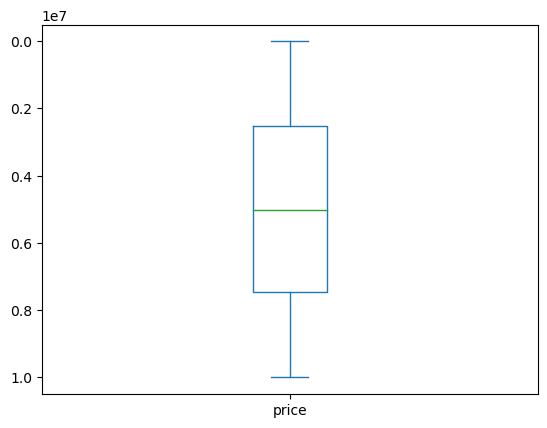

In [11]:
import matplotlib.pyplot as plt

df_dataUTS2.price.plot(kind='box')
plt.gca().invert_yaxis()
plt.show()

Menghapus data outlier

Jumlah baris DataFrame sebelum dibuat outlier 10000
Jumlah baris DataFrame setelah dibuat outlier 0


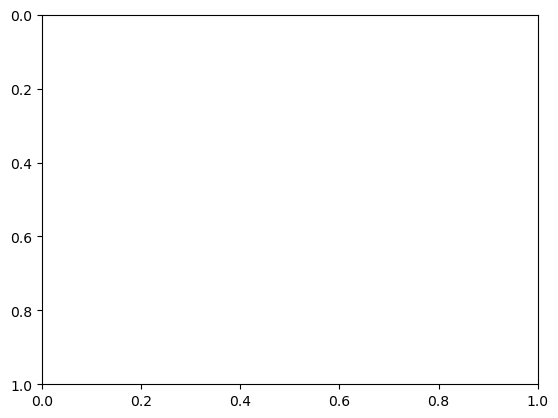

In [12]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(df_dataUTS2):
    for col_name in list(df_dataUTS2.columns):
        if is_numeric_dtype(df_dataUTS2[col_name]):
            Q1 = df_dataUTS2[col_name].quantile(0.25)
            Q3 = df_dataUTS2[col_name].quantile(0.75)

            IQR = Q3 - Q1
            batas_atas = Q1 - 1.5 * IQR
            batas_bawah = Q3 + 1.5 * IQR
            df_dataUTS2 = df_dataUTS2.loc[(df_dataUTS2[col_name] > batas_bawah) & (df_dataUTS2[col_name] < batas_atas)]
    return df_dataUTS2

df_dataUTS_clean = remove_outlier(df_dataUTS2)
print("Jumlah baris DataFrame sebelum dibuat outlier", df_dataUTS2.shape[0])
print("Jumlah baris DataFrame setelah dibuat outlier", df_dataUTS_clean.shape[0])

# membalik sumbu y
plt.gca().invert_yaxis()
plt.show()

### 4. Data Encoding

Encoding kolom kategori menggunakan teknik One-Hot Encoding

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectKBest, chi2

# kolom kategori
cat_cols = ["hasyard", "haspool", "isnewbuilt", "hasstormprotector", "hasstorageroom"]

encoder = OneHotEncoder(sparse_output=False, drop='first')
column_transformer = make_column_transformer(
    (encoder, cat_cols),
    remainder='passthrough'
)

# transformasi data latih dan uji
X_classif_train_enc = column_transformer.fit_transform(X_classif_train)
X_classif_test_enc = column_transformer.transform(X_classif_test)

df_train_enc = pd.DataFrame(X_classif_train_enc, columns=column_transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(X_classif_test_enc, columns=column_transformer.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

,onehotencoder__hasyard_yes,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_yes,remainder__squaremeters,remainder__numberofrooms,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom
0,0.0,1.0,1.0,0.0,0.0,76347.0,73.0,13.0,42855.0,9.0,6.0,2015.0,2560.0,6823.0,239.0,10.0
1,1.0,1.0,1.0,1.0,1.0,98678.0,95.0,3.0,75381.0,5.0,6.0,2003.0,6810.0,1391.0,556.0,3.0
2,0.0,0.0,1.0,0.0,1.0,13972.0,39.0,8.0,91674.0,2.0,2.0,2009.0,1477.0,3153.0,952.0,2.0
3,0.0,1.0,0.0,0.0,1.0,16147.0,47.0,63.0,58471.0,10.0,1.0,1990.0,1730.0,7967.0,722.0,0.0
4,1.0,0.0,0.0,0.0,0.0,48637.0,64.0,83.0,30779.0,6.0,4.0,1992.0,594.0,8310.0,898.0,5.0
5,1.0,1.0,1.0,1.0,1.0,64307.0,91.0,67.0,65183.0,1.0,10.0,2019.0,6824.0,7141.0,956.0,6.0
6,1.0,1.0,1.0,1.0,1.0,69164.0,48.0,70.0,21012.0,5.0,3.0,2007.0,5861.0,2750.0,652.0,10.0
7,1.0,1.0,1.0,1.0,1.0,93132.0,93.0,35.0,12062.0,10.0,9.0,1998.0,2064.0,2720.0,315.0,5.0
8,1.0,0.0,0.0,1.0,1.0,29178.0,74.0,14.0,76662.0,9.0,6.0,2004.0,9501.0,9579.0,768.0,1.0
9,0.0,0.0,0.0,0.0,1.0,47006.0,72.0,76.0,87732.0,2.0,8.0,2017.0,6414.0,6111.0,613.0,7.0


Memilih fitur terbaik dari dataset yang telah di-encode dan mempersiapkan data untuk pelatihan model

In [14]:
enc_feat_names = column_transformer.get_feature_names_out()

# dataFrame data latih dan uji
X_classif_train_enc_df = pd.DataFrame(X_classif_train_enc, columns=enc_feat_names)
X_classif_test_enc_df = pd.DataFrame(X_classif_test_enc, columns=enc_feat_names)

X_classif_train_enc_df['label'] = y_classif_train.values
X_classif_test_enc_df['label'] = y_classif_test.values

# fitur terbaik menggunakan SelectKBest
X = X_classif_train_enc_df.drop("label", axis=1)
y = X_classif_train_enc_df["label"]

# Memilih k fitur terbaik
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)

# Menampilkan fitur yang dipilih
selected_features = X.columns[selector.get_support()]
print("Fitur yang dipilih:")
print(selected_features)

# Menyiapkan data untuk model
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=78)

Fitur yang dipilih:
Index(['remainder__squaremeters', 'remainder__citycode', 'remainder__basement',
       'remainder__attic', 'remainder__garage'],
      dtype='object')


One-Hot Encoding pada kolom kategori

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

cat_cols = ["hasyard", "haspool", "isnewbuilt", "hasstormprotector", "hasstorageroom"]

enc = OneHotEncoder()
column_transformer = make_column_transformer(
    (enc, cat_cols),
    remainder='passthrough'
)

df_dataUTS_encoded = column_transformer.fit_transform(df_dataUTS2)

df_dataUTS_enc = pd.DataFrame(df_dataUTS_encoded, columns=column_transformer.get_feature_names_out())
df_dataUTS_enc.head(10)

,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom,remainder__price,remainder__category
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,9373,3,8,2005,4313,9005,956,7,7559081.5,Luxury
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,34457,6,8,2021,2937,8852,135,9,5574642.1,Middle
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,98155,3,4,2003,6326,4748,654,10,8696869.3,Luxury
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,9047,8,3,2012,632,5792,807,5,5154055.2,Middle
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,92029,4,2,2011,5414,1172,716,9,9652258.1,Luxury
5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,54812,10,5,2018,8871,7117,240,7,7986665.8,Luxury
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,6517,6,9,2009,4878,281,384,5,7607322.9,Luxury
7,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,61711,3,9,2011,3054,129,726,9,6420823.1,Middle
8,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,71982,3,7,2000,7507,9056,892,1,9244344.0,Luxury
9,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,9382,7,9,1994,615,1221,328,10,9515440.4,Luxury


Mengubah kategori menjadi target dan menghapus kolom harga

In [16]:
from collections import Counter
from imblearn.over_sampling import SMOTE

dataUTS_Classif = df_dataUTS_enc.drop(columns=['remainder__price'])

X_Classif = dataUTS_Classif.drop(columns=['remainder__category'],axis=1)
y_Classif = dataUTS_Classif.remainder__category

smt = SMOTE()
print(Counter(y_Classif))

X_classif, y_classif = smt.fit_resample(X_Classif,y_Classif)
print(Counter(y_classif_train))

Counter({'Basic': 4344, 'Luxury': 3065, 'Middle': 2591})
Counter({'Basic': 3253, 'Luxury': 2315, 'Middle': 1932})


### 5. Model Pipeline
### Notebook 1: Random Forest dan Logistic Regression
Model Klasifikasi
- Data scaling: StandarScaler dan MinMaxScaler
- Feature selection: SelectKBest dan SelectPercentile 


Random Forest Classifier

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.feature_selection import SelectPercentile, SelectKBest 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe_RF = Pipeline(steps=[ 
    ('data_scaling', StandardScaler()), 
    ('feature_selection', SelectKBest()), 
    ('clf', RandomForestClassifier(random_state=78, class_weight='balanced')) 
])

params_grid_RF = [ 
    { 
        'data_scaling': [StandardScaler()], 
        'feature_selection__k': [2, 6], 
        'clf__max_depth': np.arange(4, 5), 
        'clf__n_estimators': [100, 150], 
    }, 
    { 
        'data_scaling': [StandardScaler()], 
        'feature_selection': [SelectPercentile()], 
        'feature_selection__percentile': np.arange(20, 50), 
        'clf__max_depth': np.arange(4, 5), 
        'clf__n_estimators': [100, 150], 
    }, 
    { 
        'data_scaling': [MinMaxScaler()], 
        'feature_selection__k': [2, 6], 
        'clf__max_depth': np.arange(4, 5),
        'clf__n_estimators': [100, 150], 
    }, 
    { 
        'data_scaling': [MinMaxScaler()], 
        'feature_selection': [SelectPercentile()], 
        'feature_selection__percentile': np.arange(20, 50), 
        'clf__max_depth': np.arange(4, 5), 
        'clf__n_estimators': [100, 150], 
    } 
]

SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=78)

GSCV_RF = GridSearchCV(pipe_RF, params_grid_RF, cv=SKF) 
GSCV_RF.fit(X_classif_train_enc, y_classif_train) 
print("GSCV RF finished")

c:\Users\HP\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GSCV RF finished


Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectKBest, SelectPercentile

pipe_LR = Pipeline(steps=[
    ('data_scaling', StandardScaler()),  
    ('feature_selection', SelectKBest()),
    ('clf', LogisticRegression(random_state=78, class_weight='balanced', solver='liblinear'))
])

params_grid_LR = [
    {
        'data_scaling': [StandardScaler()],
        'feature_selection__k': [2, 6],  
        'clf__C': [0.1, 1, 10],
        'clf__penalty': ['l1', 'l2']
    },
    {
        'data_scaling': [StandardScaler()],
        'feature_selection': [SelectPercentile()],
        'feature_selection__percentile': np.arange(20, 50, 10),
        'clf__C': [0.1, 1, 10],
        'clf__penalty': ['l1', 'l2']
    },
    {
        'data_scaling': [MinMaxScaler()],
        'feature_selection__k': [2, 6],  
        'clf__C': [0.1, 1, 10],
        'clf__penalty': ['l1', 'l2']
    },
    {
        'data_scaling': [MinMaxScaler()],
        'feature_selection': [SelectPercentile()],
        'feature_selection__percentile': np.arange(20, 50, 10),
        'clf__C': [0.1, 1, 10],
        'clf__penalty': ['l1', 'l2']
    }
]

SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=78)

GSCV_LR = GridSearchCV(pipe_LR, params_grid_LR, cv=SKF)
GSCV_LR.fit(X_classif_train_enc, y_classif_train)
print("GSCV LR finished")

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

GSCV LR finished


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 6. Modul Training and Evaluation
### Notebook 1: Random Forest dan Logistic Regression
Model Klasifikasi
- Confusion matrix
- Metrik akurasi
- Precision
- Recall
- F1-score

Random Forest

In [19]:
from sklearn.metrics import classification_report

# metrik evaluasi
print("CV Score: {}".format(GSCV_RF.best_score_))
print("Test Score: {}".format(GSCV_RF.best_estimator_.score(X_classif_test_enc, y_classif_test)))
print("Best model:", GSCV_RF.best_estimator_)

# fitur terbaik
mask = GSCV_RF.best_estimator_.named_steps['feature_selection'].get_support()
print("Best features:", df_train_enc.columns[mask])

# prediksi dan evaluasi
RF_pred = GSCV_RF.predict(X_classif_test_enc)

# precision, recall, F1-score, accuracy
print("Confusion matrix RF: \n", y_classif_test, RF_pred)
print("Classification report RF: \n", classification_report(y_classif_test, RF_pred))

CV Score: 0.9994666666666667
Test Score: 0.9992
Best model: Pipeline(steps=[('data_scaling', StandardScaler()),
                ('feature_selection', SelectKBest(k=6)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        random_state=78))])
Best features: Index(['onehotencoder__hasyard_yes', 'onehotencoder__haspool_yes',
       'onehotencoder__isnewbuilt_old', 'remainder__squaremeters',
       'remainder__numberofrooms', 'remainder__garage'],
      dtype='object')
Confusion matrix RF: 
 4208    Luxury
3619    Luxury
5826     Basic
6538     Basic
8787     Basic
         ...  
1158    Middle
6891     Basic
6870     Basic
3699    Middle
6468     Basic
Name: category, Length: 2500, dtype: object ['Luxury' 'Luxury' 'Basic' ... 'Basic' 'Middle' 'Basic']
Classification report RF: 
               precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      1091
      Luxury   

Random Forest

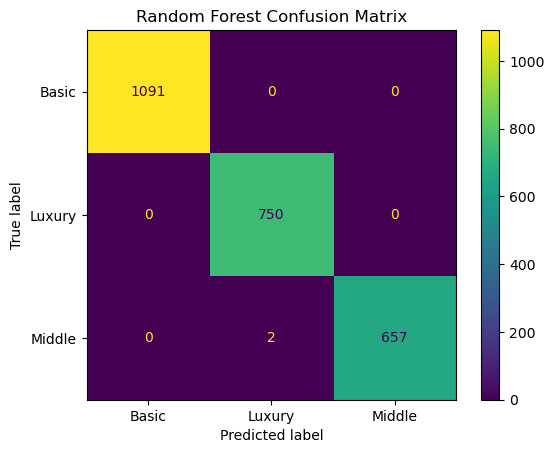

Classification Report Random Forest: 
               precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      1091
      Luxury       1.00      1.00      1.00       750
      Middle       1.00      1.00      1.00       659

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_classif_test, RF_pred, labels=GSCV_RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_RF.classes_)
disp.plot()

plt.title("Random Forest Confusion Matrix")
plt.show()

# precision, recall, dan F1-score 
print("Classification Report Random Forest: \n", classification_report(y_classif_test, RF_pred))

Logistic Regression

In [21]:
# metrik evaluasi
print("CV Score: {}".format(GSCV_LR.best_score_))
print("Test Score: {}".format(GSCV_LR.best_estimator_.score(X_classif_test_enc, y_classif_test)))
print("Best model:", GSCV_LR.best_estimator_)

# fitur terbaik
mask = GSCV_LR.best_estimator_.named_steps['feature_selection'].get_support()
print("Best features:", df_train_enc.columns[mask])

# prediksi dan evaluasi
LR_pred = GSCV_LR.predict(X_classif_test_enc)

# precision, recall, F1-score, accuracy
print("Confusion matrix LR: \n", y_classif_test, LR_pred)
print("Classification report LR: \n", classification_report(y_classif_test, LR_pred))

CV Score: 0.8790666666666667
Test Score: 0.876
Best model: Pipeline(steps=[('data_scaling', StandardScaler()),
                ('feature_selection', SelectKBest(k=6)),
                ('clf',
                 LogisticRegression(C=10, class_weight='balanced', penalty='l1',
                                    random_state=78, solver='liblinear'))])
Best features: Index(['onehotencoder__hasyard_yes', 'onehotencoder__haspool_yes',
       'onehotencoder__isnewbuilt_old', 'remainder__squaremeters',
       'remainder__numberofrooms', 'remainder__garage'],
      dtype='object')
Confusion matrix LR: 
 4208    Luxury
3619    Luxury
5826     Basic
6538     Basic
8787     Basic
         ...  
1158    Middle
6891     Basic
6870     Basic
3699    Middle
6468     Basic
Name: category, Length: 2500, dtype: object ['Luxury' 'Luxury' 'Basic' ... 'Basic' 'Basic' 'Basic']
Classification report LR: 
               precision    recall  f1-score   support

       Basic       0.83      0.90      0.87      109

Logistic Regression

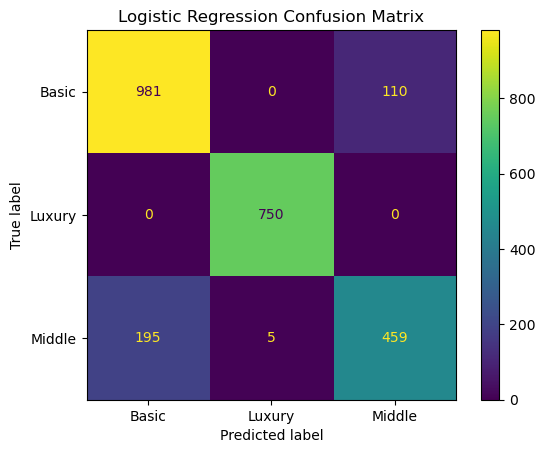

Classification Report Logistic Regression: 
               precision    recall  f1-score   support

       Basic       0.83      0.90      0.87      1091
      Luxury       0.99      1.00      1.00       750
      Middle       0.81      0.70      0.75       659

    accuracy                           0.88      2500
   macro avg       0.88      0.87      0.87      2500
weighted avg       0.87      0.88      0.87      2500



In [22]:
cm = confusion_matrix(y_classif_test, LR_pred, labels=GSCV_LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_LR.classes_)
disp.plot()

plt.title("Logistic Regression Confusion Matrix")
plt.show()

# precision, recall, dan F1-score
print("Classification Report Logistic Regression: \n", classification_report(y_classif_test, LR_pred))

### 7. Model Deployment

In [23]:
import pickle

with open('BestModel_CLF_RandomForest_Shogun.pkl', 'wb') as f:
    pickle.dump(GSCV_RF, f) # model terbaiknya adalah Random Forest Classifier

print("Model terbaik berhasil disimpan!.")

Model terbaik berhasil disimpan!.
